In [1]:
from FocusReportSlicing import selectPages, extractSubset, brokerFilter
import time
import boto3
from sagemaker.session import Session
import sys
import numpy as np
import os
import matplotlib.pyplot as plt

company_email = 'mathias.andler@ny.frb.org'
s3_pointer = boto3.client('s3')
s3_session = Session()

s3_bucket = "x17-a5-mathias-version-nit"
temp_folder ='temp/'


In [ ]:
from GLOBAL import GlobVars
export_pdf = GlobVars.temp_folder_pdf_slice
export_png = GlobVars.temp_folder_png_slice
input_raw = GlobVars.input_folder_raw
input_pdf = temp_folder + 'X-17A-5-PDF-SUBSETS/'
out_folder_raw_pdf = temp_folder + 'X-17A-5-PDF-RAW/'

pdf_paths = s3_session.list_s3_files(s3_bucket, export_pdf)
input_paths = s3_session.list_s3_files(s3_bucket, input_raw)

raw_pdf_files = s3_session.list_s3_files(s3_bucket, input_pdf)
output_pdf_csvs = s3_session.list_s3_files(s3_bucket, out_folder_raw_pdf)


In [ ]:
import json
from ExtractBrokerDealers import dealerData
parse_years = np.arange(1993,2022)

s3_pointer.download_file(s3_bucket, temp_folder + 'CIKandDealers.json', 'temp.json')
with open('temp.json', 'r') as f: old_cik2brokers = json.loads(f.read())
cik2brokers = dealerData(years=parse_years,company_email=company_email, cik2brokers=old_cik2brokers)   

# re-assign contents with new additional information 
os.remove('temp.json')

broker_dealers_list = cik2brokers['broker-dealers'].keys()

In [4]:
l = s3_session.list_s3_files(s3_bucket, 'temp/X-17A-5-SPLIT-PDFS/')

In [5]:
len(l)

155692

In [21]:
li_ass = l[:77846]
li_liable = l[77846:]

In [27]:
res_ass = np.copy(l[77846:])
for c, loc in enumerate(res_ass):
    res_ass[c] = res_ass[c].split('/')[-1]

In [33]:
sort_res = np.sort(res_ass)

In [34]:
sort_u = np.sort(u)

In [36]:
sort_u

array(['.ipynb_checkpoints', '1000146-2002-03-13.csv',
       '1000146-2003-03-03.csv', ..., '99947-2002-03-04.csv',
       '99947-2003-03-03.csv', '99947-2004-08-03.csv'], dtype='<U22')

In [35]:
sort_res

array(['1000146-2002-03-13.csv', '1000146-2003-03-03.csv',
       '1000146-2004-03-08.csv', ..., '99947-2002-03-04.csv',
       '99947-2003-03-03.csv', '99947-2004-08-03.csv'], dtype='<U65')

In [44]:
todo = [x for x in sort_res if x not in intersection_set]

In [46]:
len(todo)

345

In [37]:
intersection_set = list(set.intersection(set(sort_u), set(sort_res)))


In [39]:
len(intersection_set)

77501

In [30]:
u[0] in res_ass

True

In [9]:
from os import listdir

In [10]:
u = os.listdir('split_assets/')

In [11]:
v = os.listdir('split_liabilities/')

In [17]:
len(u), len(v)

(77502, 77502)

In [165]:
v[0][-3:]

'csv'

In [119]:
u = os.listdir('split_assets/')
#del u[8792]

In [120]:
len(u)

77502

In [15]:
for k,uval in enumerate(v):
    if uval[-3:] != 'csv':
        break


In [16]:
k

49781

In [148]:
cik2brokers

{'years-covered': ['1993/QTR1',
  '1993/QTR2',
  '1993/QTR3',
  '1993/QTR4',
  '1994/QTR1',
  '1994/QTR2',
  '1994/QTR3',
  '1994/QTR4',
  '1995/QTR1',
  '1995/QTR2',
  '1995/QTR3',
  '1995/QTR4',
  '1996/QTR1',
  '1996/QTR2',
  '1996/QTR3',
  '1996/QTR4',
  '1997/QTR1',
  '1997/QTR2',
  '1997/QTR3',
  '1997/QTR4',
  '1998/QTR1',
  '1998/QTR2',
  '1998/QTR3',
  '1998/QTR4',
  '1999/QTR1',
  '1999/QTR2',
  '1999/QTR3',
  '1999/QTR4',
  '2000/QTR1',
  '2000/QTR2',
  '2000/QTR3',
  '2000/QTR4',
  '2001/QTR1',
  '2001/QTR2',
  '2001/QTR3',
  '2001/QTR4',
  '2002/QTR1',
  '2002/QTR2',
  '2002/QTR3',
  '2002/QTR4',
  '2003/QTR1',
  '2003/QTR2',
  '2003/QTR3',
  '2003/QTR4',
  '2004/QTR1',
  '2004/QTR2',
  '2004/QTR3',
  '2004/QTR4',
  '2005/QTR1',
  '2005/QTR2',
  '2005/QTR3',
  '2005/QTR4',
  '2006/QTR1',
  '2006/QTR2',
  '2006/QTR3',
  '2006/QTR4',
  '2007/QTR1',
  '2007/QTR2',
  '2007/QTR3',
  '2007/QTR4',
  '2008/QTR1',
  '2008/QTR2',
  '2008/QTR3',
  '2008/QTR4',
  '2009/QTR1',
  '2009/

In [66]:
import shutil

In [71]:
for c in range(1722,17222):
    r = l[c]
    if c%500 == 0:
        print(c)
    name = r.split('/')[-1]
    shutil.move('split_assets/' + name,'split_liabilities/')

2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000


## Code for Assets

In [95]:
for c in range(17224,17230):
    r = l[c]
    if c%500 == 0:
        print(c)
    name = r.split('/')[-1]
    s3_pointer.download_file(s3_bucket, r, 'split_assets/'+name)


## Code for liabilities

In [112]:
len(l)

155002

In [114]:
l[0]

'temp/X-17A-5-SPLIT-PDFS/Assets/1000146-2002-03-13.csv'

In [113]:
l[100000]

'temp/X-17A-5-SPLIT-PDFS/Liability & Equity/1217452-2007-01-29.csv'

In [ ]:
c = 77501 + 17200

In [136]:
print(c)
c = c - 2
while c < 155002:
    r = l[c]
    if c%500 == 0:
        print(c)
    name = r.split('/')[-1]
    s3_pointer.download_file(s3_bucket, r, 'split_liabilities/'+name)
    c = c + 1


133201
133500
134000
134500
135000
135500
136000
136500
137000
137500
138000
138500
139000
139500
140000
140500
141000
141500
142000
142500
143000
143500
144000
144500
145000
145500
146000
146500
147000
147500
148000
148500
149000
149500
150000
150500
151000
151500
152000
152500
153000
153500
154000
154500
155000


In [131]:
print(c)

133201


In [37]:
input_raw

'input/X-17A-5/'

In [39]:
'temp/X-17A-5-SPLIT-PDFS/'


'temp/X-17A-5-SPLIT-PDFS/'

In [14]:
i

47002

In [18]:
from DatabaseUnstructured import unstructured_wrapper, reorder_columns, extra_cols, totals_check, unstructured_data

In [24]:
import pandas as pd
from joblib import Parallel, delayed

In [111]:
u = os.listdir('split_assets/')
del u[8792]

In [22]:
def paral_asset(csv_name_local,csv):
    pdf_df = pd.read_csv(csv_name_local)        
    fileName, filing_date, fiscal_year, cik = extra_cols(csv)
    
    temp_df, total_flag, total_amt = totals_check(pdf_df)
    export_df = unstructured_data(temp_df, filing_date, fiscal_year, cik, cik2brokers)
    export_df["Total asset"] = total_amt
    
    return export_df

## Number of PNGs

In [29]:
png_paths = s3_session.list_s3_files(s3_bucket, export_png)

In [30]:
png_paths

['temp/X-17A-5-PNG-SUBSETS/1000146-2002-03-13/1000146-2002-03-13-p0.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-2002-03-13/1000146-2002-03-13-p1.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-2002-03-13/1000146-2002-03-13-p2.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-2002-03-13/1000146-2002-03-13-p3.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-2002-03-13/1000146-2002-03-13-p4.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-2002-03-13/1000146-2002-03-13-p5.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-2002-03-13/1000146-2002-03-13-p6.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-2002-03-13/1000146-2002-03-13-p7.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-2002-03-13/1000146-2002-03-13-p8.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-2002-03-13/1000146-2002-03-13-p9.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-2003-03-03/1000146-2003-03-03-p0.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-2003-03-03/1000146-2003-03-03-p1.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-2003-03-03/1000146-2003-03-03-p10.png',
 'temp/X-17A-5-PNG-SUBSETS/1000146-20

In [31]:
tots = 0
for pn in png_paths:
    if '-p0' in pn:
        tots = tots + 1

In [6]:
tots

83861

In [32]:
tots

93605

In [33]:
raw_broker_dealer_pdfs = list(filter(lambda x: brokerFilter(broker_dealers_list, x), input_paths))

In [34]:
res = np.zeros(len(raw_broker_dealer_pdfs))
rerun_job = 5

temp = []
for i, path_name in enumerate(raw_broker_dealer_pdfs):        
    # check to see if values are downloaded to s3 sub-bin
    base_file = path_name.split('/')[-1].split('.')[0]
    png_look_up = export_png + base_file + '/' + base_file + '-p0.png'
    temp.append(png_look_up)

In [35]:
len(temp)

93598

In [36]:
png_done = []
for pn in png_paths:
    if '-p0' in pn:
        png_done.append(pn)

In [37]:
len(png_done)

93605

In [38]:
res = np.zeros(len(raw_broker_dealer_pdfs))
for i, path_name in enumerate(raw_broker_dealer_pdfs): 
    if i%5000 == 0:
        print(i)
    # check to see if values are downloaded to s3 sub-bin
    base_file = path_name.split('/')[-1].split('.')[0]
    png_look_up = export_png + base_file + '/' + base_file + '-p0.png'
    if png_look_up in png_done:
        res[i] = 1
    res = res.astype(bool)


0
5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000


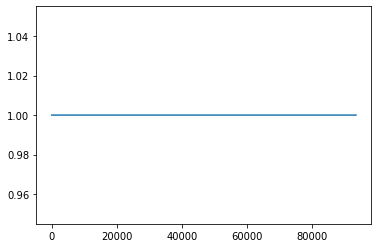

In [39]:
plt.plot(res)

In [16]:
sum(res)

93597

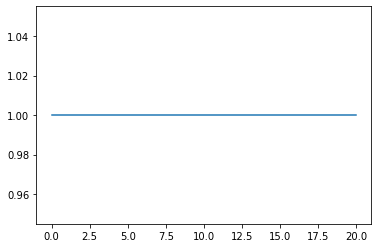

In [40]:
plt.plot(res[39860:39881])

In [28]:
res[39868]

False

In [17]:
len(res)

93598

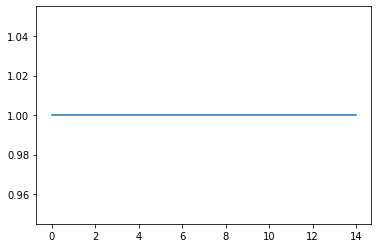

In [17]:
plt.plot(res[49405:49420])

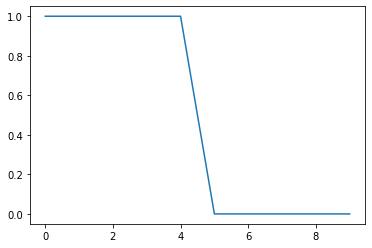

In [16]:
plt.plot(res[21150:21160])

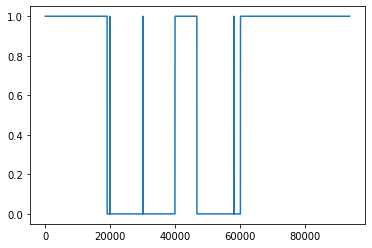

In [68]:
plt.plot(res)